# Libraries

In [1]:
from pycocotools.coco import COCO
import joblib
import time

import os
import numpy as np
import pandas as pd
import skimage.io as io
import matplotlib.pyplot as plt

# CocoHelper Class

In [2]:
class CocoHelper:
    def __init__(self, dataDir='../data/coco/', dataType=['train2017','val2017']):
        """
        args:
            dataDir: data directory
            dataType: accepted values ['train2017', 'val2017']
        """
        
        self.dataDir = dataDir
        self.dataType = dataType
        
        self.coco1 = None # coco object of train dataset
        self.coco2 = None # coco object of val dataset
        
        self.coco1, self.coco2 = self.loadAnnFiles()
        
        
        
        return None
    
    ##############################################################################
    ########### Generate main coco object and other categories  ##################
    ##############################################################################
    
    def loadAnnFiles(self):
        """
        Load annotations and categories of required folder
        args:
            None
        returns:
            tuple containing dictionaries (train_obj_dict, val_obj_dict)
        """
        ################### load train annotations ###################
        try:
            annFile1 ='{}/annotations/instances_{}.json'.format(self.dataDir,self.dataType[0])
            self.coco1 = COCO(annFile1)
            
            categories1 = self.coco1.loadCats(self.coco1.getCatIds())
            cat1 = [c['name'] for c in categories1]
            sup_categories1 = set([c['supercategory'] for c in categories1])
            
            
            train_obj_dict={
                "loaded_annFile":self.coco1,
                "categories":cat1,
                "sup_categories":sup_categories1
            }
            
            print()
        except Exception as e:
            print(e)

        ################### load validation annotations ###############
        try:
            annFile2 = '{}/annotations/instances_{}.json'.format(self.dataDir,self.dataType[1])
            self.coco2 = COCO(annFile2)
            
            categories2 = self.coco2.loadCats(self.coco2.getCatIds())
            cat2 = [c['name'] for c in categories2]
            sup_categories2 = set([c['supercategory'] for c in categories2])
            
            val_obj_dict = {
                "loaded_annFile":self.coco2,
                "categories":cat2,
                "sup_categories":sup_categories2
            }
            
            print()
        except Exception as e:
            print(e)

        return (train_obj_dict, val_obj_dict)
    
    
    ##############################################################################
    ########### Specific Function Get Ids of required categories #################
    ##############################################################################
    
    def get_img_id(self,coco,imgIds=[], catIds=[]):
        imgIds = coco.getImgIds(catIds=catIds)
        return imgIds
    

co_ob = CocoHelper()

loading annotations of instances_train2017.json into memory...
Done (t=17.77s)
creating index...
index created!

loading annotations of instances_val2017.json into memory...
Done (t=0.58s)
creating index...
index created!



# Create Objects

In [3]:
coco1 = co_ob.coco1
coco2 = co_ob.coco2

In [4]:
cc1 = co_ob.coco1['loaded_annFile']
cc2 = co_ob.coco2['loaded_annFile']

# Super-category and Category

In [5]:
def get_all_category_dict(self,coco,categories,sup_categories):
    d1 = {}
    d2 = {}
    for i in sup_categories:
        d1[i] = cc1.getCatIds(supNms=i)
    
    for i in categories:
        d2[i] = cc1.getCatIds(catNms=i)
    return (d1,d2)

sup_c, c = get_all_category_dict(0,cc1,coco1['categories'], coco1['sup_categories'])
print(sup_c)
print("\n",c)

{'furniture': [62, 63, 64, 65, 67, 70], 'animal': [16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'accessory': [27, 28, 31, 32, 33], 'sports': [34, 35, 36, 37, 38, 39, 40, 41, 42, 43], 'kitchen': [44, 46, 47, 48, 49, 50, 51], 'indoor': [84, 85, 86, 87, 88, 89, 90], 'electronic': [72, 73, 74, 75, 76, 77], 'outdoor': [10, 11, 13, 14, 15], 'food': [52, 53, 54, 55, 56, 57, 58, 59, 60, 61], 'appliance': [78, 79, 80, 81, 82], 'person': [1], 'vehicle': [2, 3, 4, 5, 6, 7, 8, 9]}

 {'person': [1], 'bicycle': [2], 'car': [3], 'motorcycle': [4], 'airplane': [5], 'bus': [6], 'train': [7], 'truck': [8], 'boat': [9], 'traffic light': [10], 'fire hydrant': [11], 'stop sign': [13], 'parking meter': [14], 'bench': [15], 'bird': [16], 'cat': [17], 'dog': [18], 'horse': [19], 'sheep': [20], 'cow': [21], 'elephant': [22], 'bear': [23], 'zebra': [24], 'giraffe': [25], 'backpack': [27], 'umbrella': [28], 'handbag': [31], 'tie': [32], 'suitcase': [33], 'frisbee': [34], 'skis': [35], 'snowboard': [36], 'sports ball

In [6]:
####### PUT this function in coco helper #######
"""
This function is able to load only one category and return respective image id set
Put this in loop
"""
def get_img_id(self,coco,imgIds=[], catIds=[]):
    imgIds = coco.getImgIds(catIds=catIds)
    return imgIds

category = 'car'
car_ids = get_img_id(0,cc1,catIds=c[category])

In [7]:
type(car_ids[0])

int

In [8]:
req_id_train, req_id_val = get_img_id(0,cc1,catIds=c[category]), get_img_id(0,cc2,catIds=c[category])

# Load all images and respective paths

In [9]:
from loadData import LoadData
l_ob = LoadData("../data/coco/")

"""
Make dataset in such a way that it has image_id, path, category_id, super_category
"""

img_path_df = l_ob.getImgPath_DataFrame() # get dataframe of all images

Loaded    5000 Imgaes from : val2017 
Loaded   40670 Imgaes from : test2017 
Loaded  118287 Imgaes from : train2017 
Loaded  163957 Imgaes from : ../data/coco/ 


In [10]:
img_path_df.head()

id                                   path
0  117197  ../data/coco/val2017/000000117197.jpg
1  348481  ../data/coco/val2017/000000348481.jpg
2   76468  ../data/coco/val2017/000000076468.jpg
3  170955  ../data/coco/val2017/000000170955.jpg
4  263068  ../data/coco/val2017/000000263068.jpg

# Get Images of required category
- This is train set cc1 is used above

In [11]:
img_path_df.loc[img_path_df['id'].isin(car_ids)].head() # select required image ids

id                                     path
45670  475692  ../data/coco/train2017/000000475692.jpg
45678  570203  ../data/coco/train2017/000000570203.jpg
45685  253094  ../data/coco/train2017/000000253094.jpg
45706  187473  ../data/coco/train2017/000000187473.jpg
45709  182416  ../data/coco/train2017/000000182416.jpg

Check if validation and train are disticnt

In [12]:
df1 = img_path_df.loc[img_path_df['id'].isin(req_id_train)]
df2 = img_path_df.loc[img_path_df['id'].isin(req_id_val)]

set(df1['id']).intersection(set(df2['id']))

set()

In [13]:
# get ids and get respective categories

In [14]:
def getImgCat_Datframe(self,coco,folder="train"):
    """
    Method to get all img ids and respective category ids
    
    args:
        coco: coco class object
        # cc1 -> folder="train"
        # cc2 -> folder="val"
        
    returns:
        dataframe containing 
        (img_id, category(s))
    """
    
    if os.path.exists("./picklefiles/train_master_df") and folder=="train":
        return joblib.load("./picklefiles/train_master_df")
    if  os.path.exists("./picklefiles/val_master_df") and folder=="val":
        return joblib.load("./picklefiles/val_master_df")
    
    
    all_cat_ids = coco.getCatIds()
    all_img_ids = coco.getImgIds()
    
    
    cols = ['id']
    for i in all_cat_ids:
        cols.append(i)
    
    
    df = pd.DataFrame(columns=cols)
    df['id'] = all_img_ids
    df = df.fillna(0)
    
    
    for i in all_cat_ids:
        temp_imgIds = coco.getImgIds(catIds=i)
        
        # df[df['id']==i]
        temp_ix = df[df['id'].isin(temp_imgIds)].index
        df.loc[temp_ix,i] = 1
        
    return df


# cc1 -> folder="train"
# cc2 -> folder="val"
master_df = getImgCat_Datframe(0,cc1,"train")
master_df.head(10)

id  1  2  3  4  5  6  7  8  9  ...  80  81  82  84  85  86  87  88  89  \
0  391895  1  1  0  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
1  522418  1  0  0  0  0  0  0  0  0  ...   0   1   0   0   0   0   0   0   0   
2  184613  1  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
3  318219  1  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
4  554625  1  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
5  574769  1  0  0  0  0  0  0  0  0  ...   0   1   1   0   1   0   0   0   0   
6   60623  1  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
7  309022  0  0  0  0  0  0  0  0  0  ...   0   1   0   0   0   0   0   0   0   
8    5802  1  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
9  222564  1  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   

   90  
0   0  
1   0  
2   0  
3   0  
4   0  
5   0  
6   0  
7   0  
8   0  
9   0  

[10 rows x 81 columns]

# Now get respective mask of image

In [15]:
def get_mask_of_image(self, coco, img_id, cat_id, img_path_df, master_df):
    """
    Get mask for given id of an image
    
    args:
        img_id: (int) id of an image
        img_path_df : pandas dataframe containing (img_id,path_to_file)
        master_df: pandas dataframe containing (img_id,categories[1-90])
        
    returns:
        mask for given image
    """
    
    mask = None
    req_img_id = img_id
    
    try:
        req_path = img_path_df[img_path_df['id']==req_img_id]['path'].values[0]
    except Exception as e:
        print("Check Image id:\n",e)
        return np.array([])
    
    # print(master_df[master_df['id']==req_img_id].index.values[0])
    req_img_id_ix = master_df[master_df['id']==req_img_id].index.values[0]
    # print(req_img_id, req_path)
    
    
    arr = master_df.iloc[req_img_id_ix].values
    # print(arr, type(arr))
    # print(np.where(arr==1))
    cat_ids_present_in_img = np.where(arr==1) # this line will get array index where 
                                              # required category is present
    
    cat_ids_present_in_img = cat_ids_present_in_img[0].tolist()
    # print(cat_ids_present_in_img)
    # print(cat_id)
    # print(pd.Series(cat_id).isin(pd.Series(cat_ids_present_in_img)))
    
    flag = (cat_id in cat_ids_present_in_img)
    # print(flag)
    
    if flag:
        annIds = coco.getAnnIds(imgIds=req_img_id, catIds=[cat_id], iscrowd=None)
        anns = coco.loadAnns(annIds)

        mask = coco.annToMask(anns[0])

        return mask
    else:
        return None

img_id = master_df['id'][6]
img_id = 318219
cat_id = 1


reqd_mask = get_mask_of_image(0, cc1, img_id , cat_id, img_path_df, master_df)
reqd_mask # use this as label image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

# Visualise Image and Mask

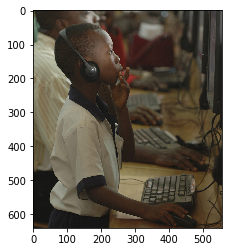

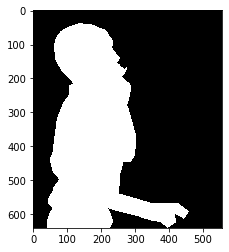

In [16]:
def plot_img_and_mask(self, img_id, mask_value, img_path_df):
    """
    Visualise image and it's mask
    args:
        img_id: id of image
        mask_value: reqd mask of image (numpy array)
        img_path_df: dataframe containing (id, path_to_image)
    returns:
        matplotlib plot of img and mask
    """
    
    
    req_path = img_path_df[img_path_df['id']==img_id]['path'].values[0]
    I = io.imread(req_path)
    
    
    fig1 = plt.figure()
    grid1 = plt.GridSpec(20,20, wspace=0.4, hspace=0.3)
    ax1 = fig1.add_subplot(grid1[:,:]) # grid[rows,cols]
    
    fig2 = plt.figure()
    grid2 = plt.GridSpec(20,20, wspace=0.4, hspace=0.3)
    ax2 = fig2.add_subplot(grid2[:,:],sharex=ax1,sharey=ax1) # grid[rows,cols]
    
    
    
    ax1.imshow(I)
    try:
        ax2.imshow(reqd_mask,cmap='gray')
    except Exception as e:
        print("No mask present for required category check category id.")
    
    
    

    plt.plot()
    
plot_img_and_mask(0,img_id, reqd_mask, img_path_df)

In [17]:
plt.close('all')

# Scratch pad